Imports </br>
(please do pip install -r requirements.txt)

In [37]:
import pandas as pd
import pandas_profiling
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Read data in a pandas dataframe

In [38]:
data = pd.read_csv("dataset/avocado.csv")

convert Date column in dataset to pandas's datetime format

In [62]:
data['Date'] = pd.to_datetime(data['Date'])

In [66]:
profile = pandas_profiling.ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In the dataset we get the average price (which are different for each region)</br>
we can get the actual average by getting the average of all the regions

<AxesSubplot: xlabel='Date'>

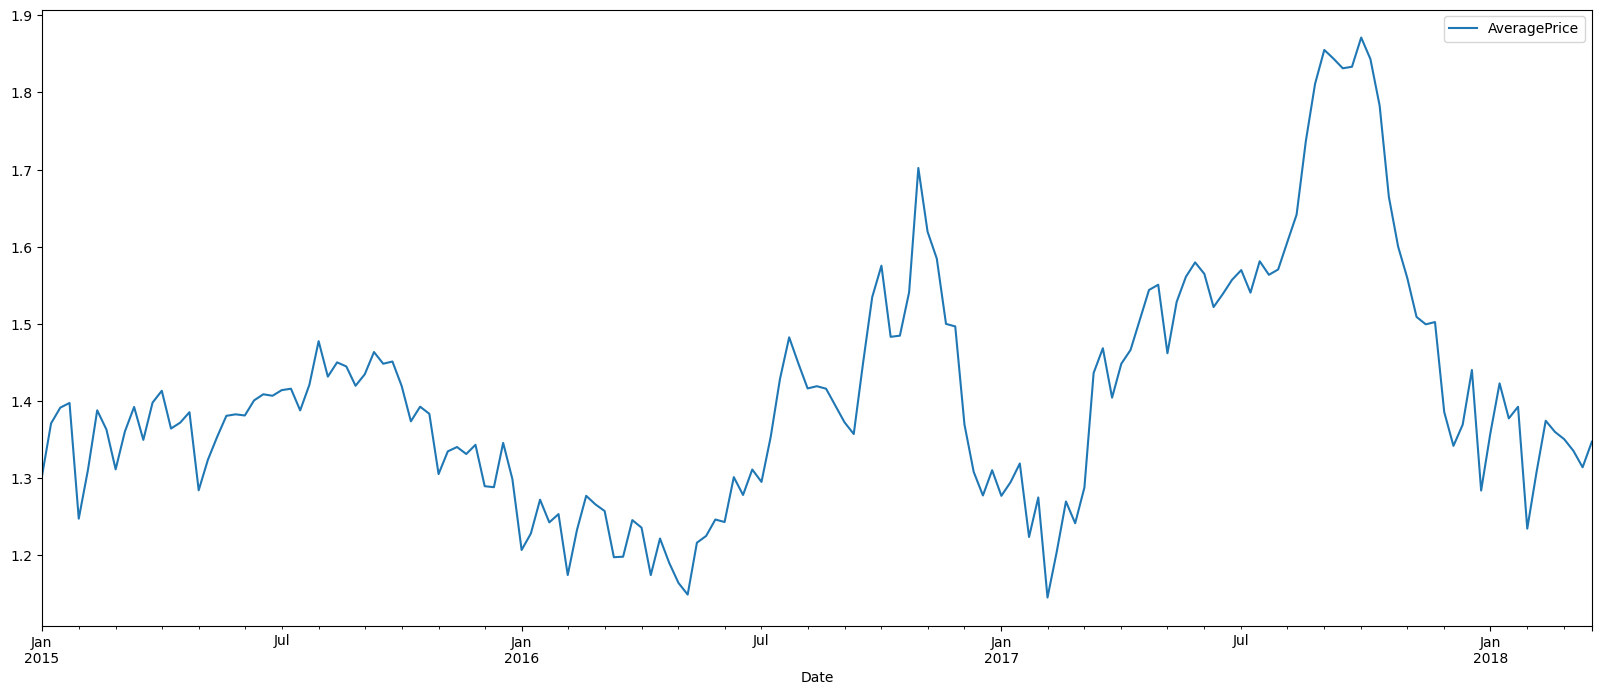

In [63]:
ts = data.groupby('Date')['AveragePrice'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ts.set_index('Date').plot(ax=ax)

generally speaking there is a hike in average price after july

<AxesSubplot: xlabel='Date'>

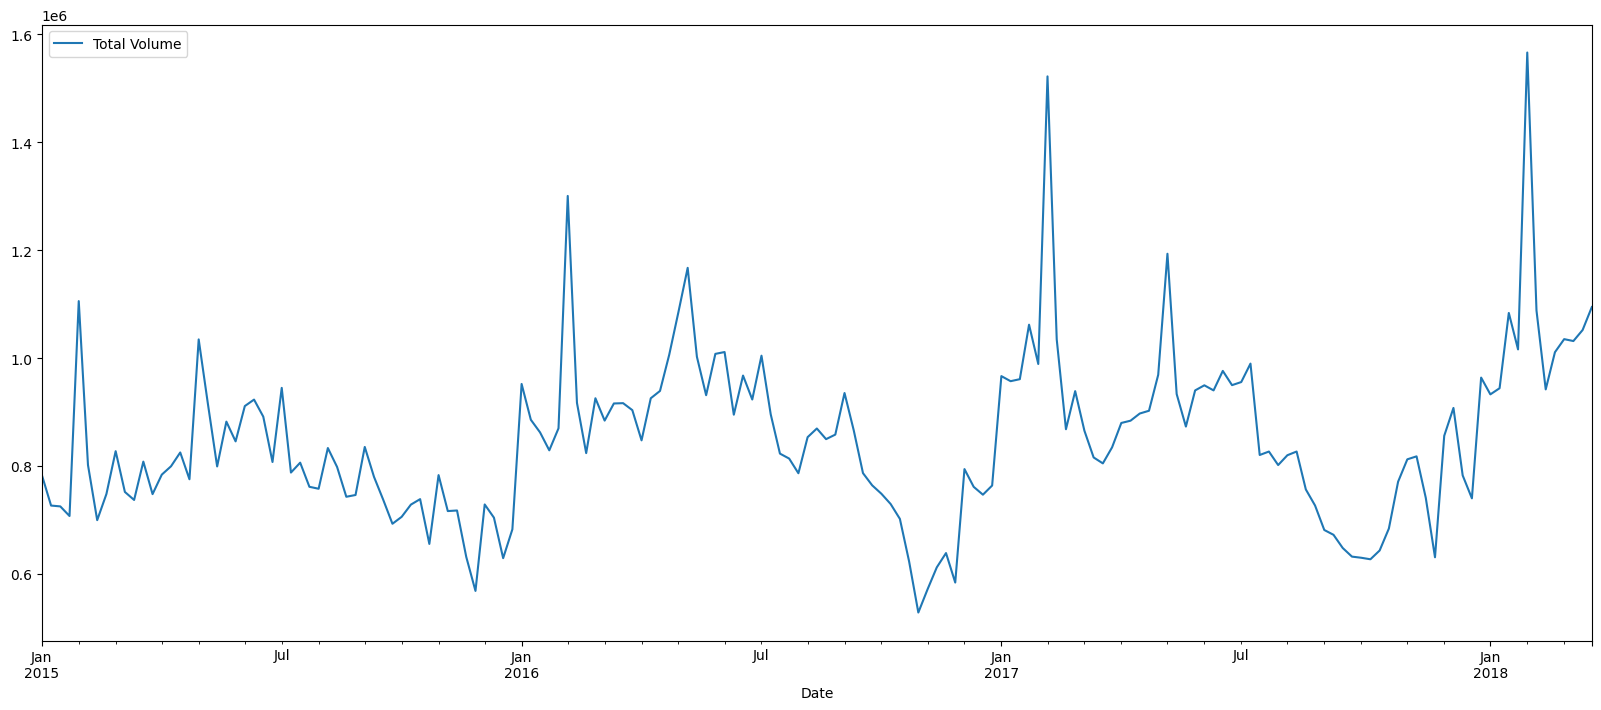

In [69]:
ts = data.groupby('Date')['Total Volume'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ts.set_index('Date').plot(ax=ax)

there is a huge volume of avocados sold at the start of the year

/tmp/ipykernel_4289/2748803264.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts = data.groupby('Date').mean()


<AxesSubplot: xlabel='Date'>

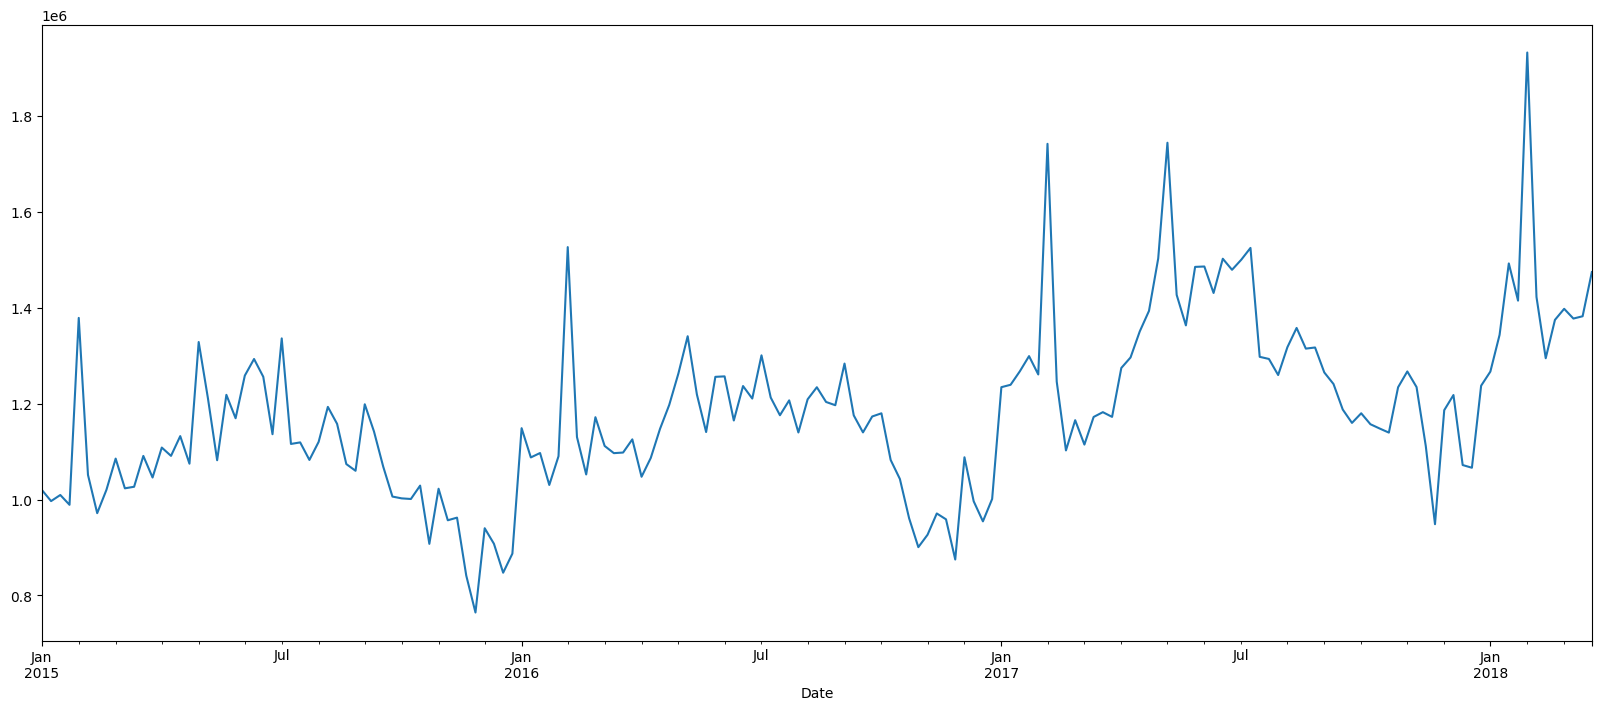

In [77]:
ts = data.groupby('Date').mean()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
revenue = ts['AveragePrice'] * ts['Total Volume']
revenue.plot(ax=ax)

/tmp/ipykernel_4289/2662137262.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[data['type'] == 'conventional'].groupby('Date').mean().plot(y = 'AveragePrice', ax=ax, label='conventional')
/tmp/ipykernel_4289/2662137262.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[data['type'] == 'organic'].groupby('Date').mean().plot(y = 'AveragePrice', ax=ax, label='organic')


<AxesSubplot: xlabel='Date'>

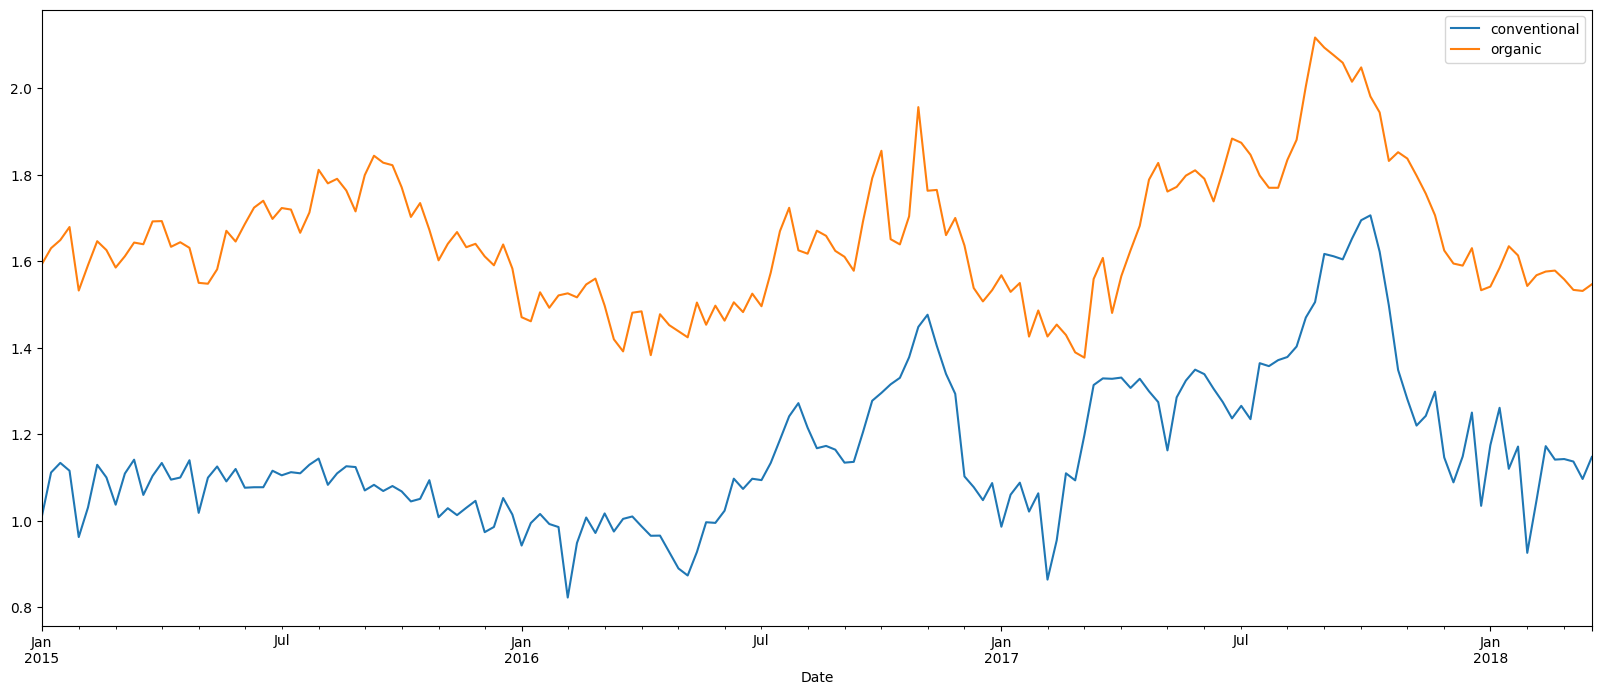

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
data[data['type'] == 'conventional'].groupby('Date').mean().plot(y = 'AveragePrice', ax=ax, label='conventional')
data[data['type'] == 'organic'].groupby('Date').mean().plot(y = 'AveragePrice', ax=ax, label='organic')

organic is alot more pricier than conventional avocados

/tmp/ipykernel_4289/3110776103.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[data['type'] == 'conventional'].groupby('Date').mean().plot(y = 'Total Volume', ax=ax, label='conventional')
/tmp/ipykernel_4289/3110776103.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[data['type'] == 'organic'].groupby('Date').mean().plot(y = 'Total Volume', ax=ax, label='organic')


<AxesSubplot: xlabel='Date'>

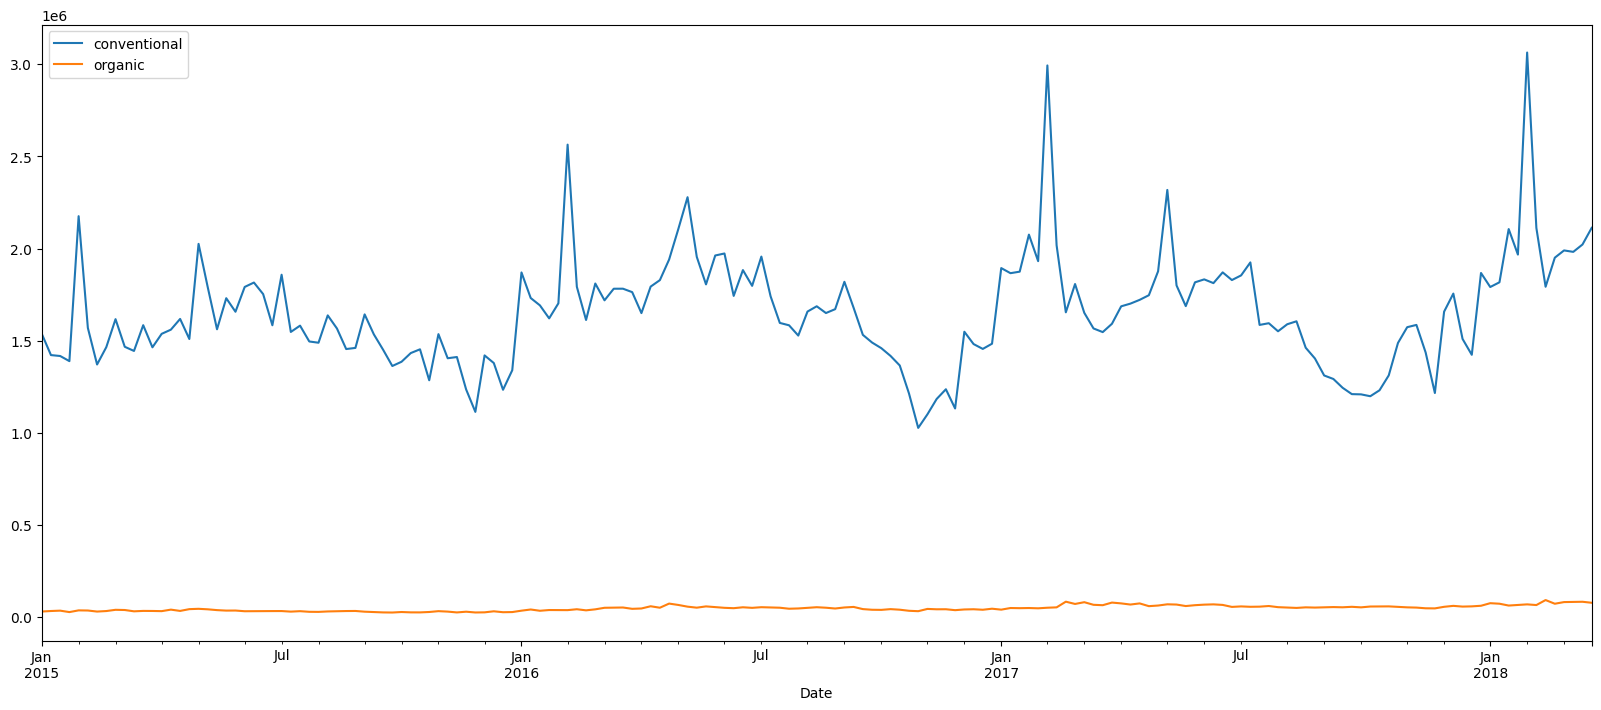

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
data[data['type'] == 'conventional'].groupby('Date').mean().plot(y = 'Total Volume', ax=ax, label='conventional')
data[data['type'] == 'organic'].groupby('Date').mean().plot(y = 'Total Volume', ax=ax, label='organic')

convenctional avocados were sold alot more than organic